# Aim

##### To predict the Medical Insurance Cost of any person by the help of their basic details like Age, Sex, BMI, etc.
##### It is based on a Model trained on a previous dataset downloaded from Kaggle

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('insurance.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
18   female  38.280  0         no      southeast  1631.82120     1
64   female  33.800  1         yes     southwest  47928.03000    1
             32.965  0         no      northwest  14692.66935    1
18   female  30.115  0         no      northeast  2203.47185     1
                                                                ..
64   female  26.885  0         yes     northwest  29330.98315    1
             30.115  3         no      northwest  16455.70785    1
             31.300  2         yes     southwest  47291.05500    1
             31.825  2         no      northeast  16069.08475    1
63   male    28.310  0         no      northwest  13770.09790    1
Name: count, Length: 1337, dtype: int64

In [11]:
# Taking some samples
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
765,57,female,31.825,0,no,northwest,11842.62375
105,20,male,28.025,1,yes,northwest,17560.37975
787,21,male,36.860,0,no,northwest,1917.31840
727,29,female,21.755,1,yes,northeast,16657.71745
394,46,female,32.300,2,no,northeast,9411.00500


## Describing columns
    1. For only numerical columns
    2. For all the columns ir-respective of their type 

In [12]:
df['charges'].max()

np.float64(63770.42801)

In [13]:
df['charges'].min()

np.float64(1121.8739)

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [16]:
# Check for age group
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

## Plotting Graphs for numerical columns

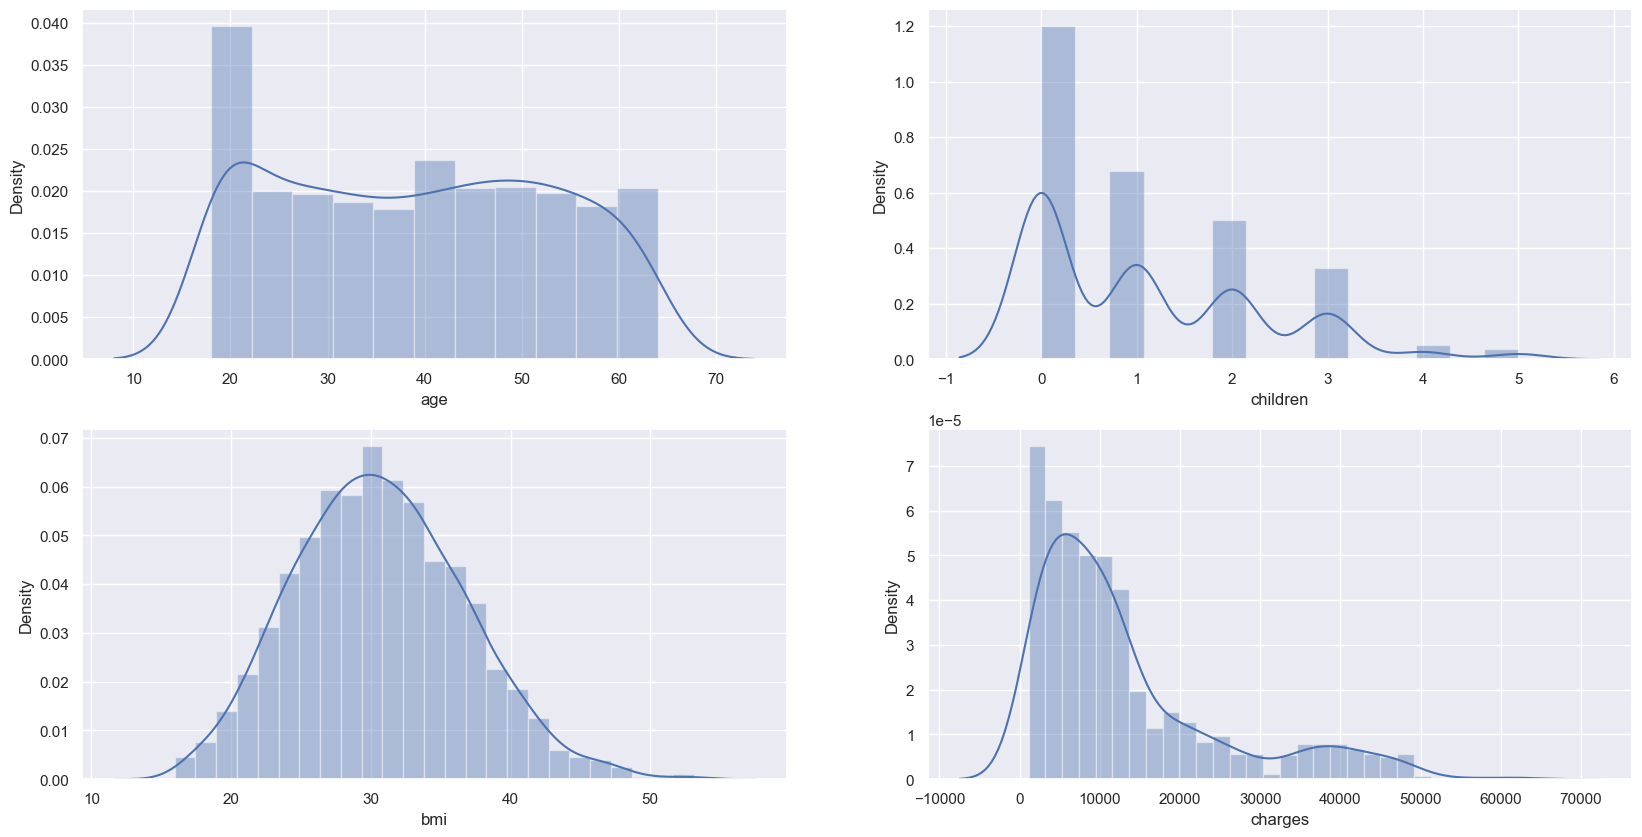

In [17]:
import warnings
warnings.filterwarnings(action='ignore')
p=['age','children', 'bmi', 'charges']

sns.set()
plt.figure(figsize=(20,10))
for indx, col in enumerate(p):
    plt.subplot(2,2,indx+1)
    sns.distplot(df[col])

#### Normal BMI Range: 18.5-24.9

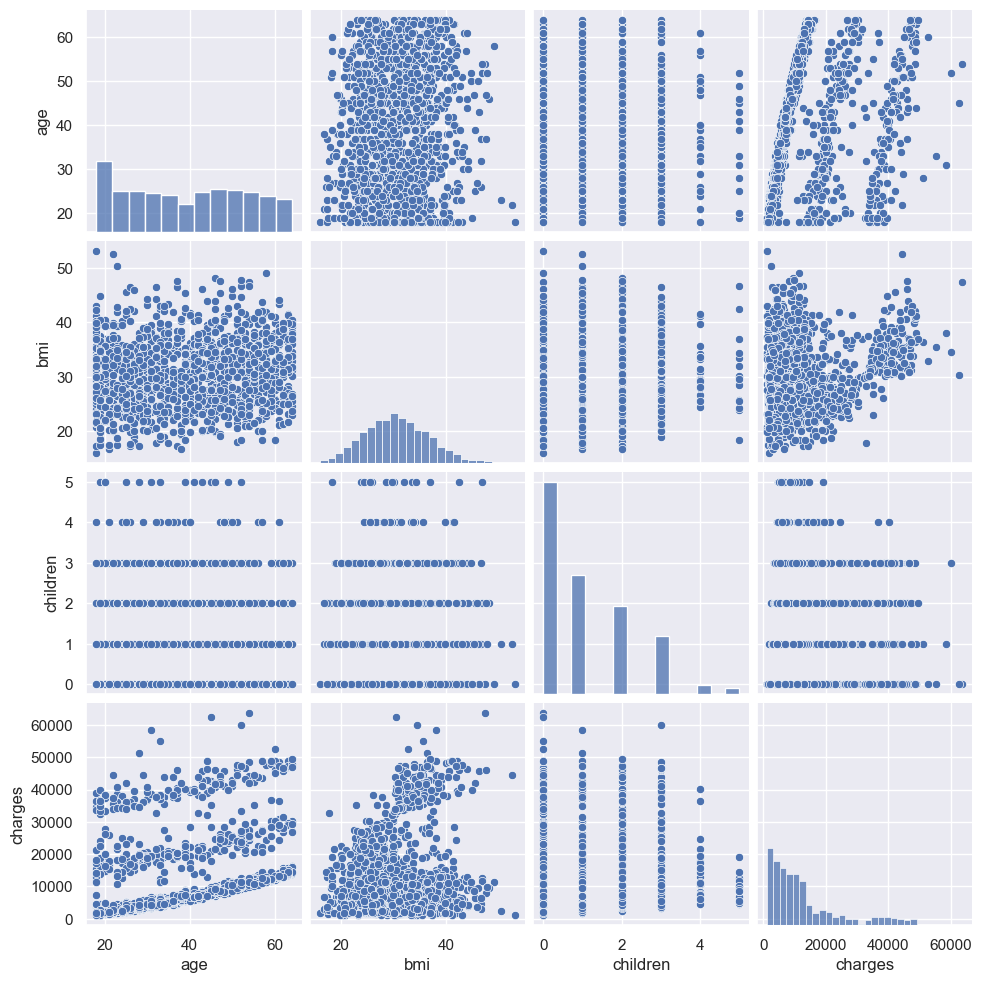

In [18]:
# Pair plot for numerical columns
sns.pairplot(df)

## Checking the different values of non-numeric columns

In [19]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [20]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [21]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='region', ylabel='count'>

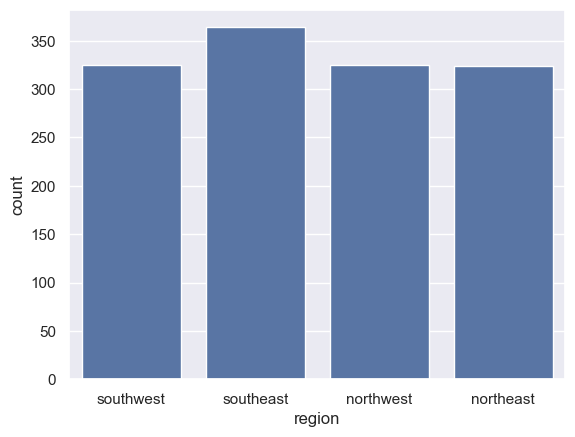

In [22]:
sns.countplot(x='region', data=df)

<Axes: xlabel='children', ylabel='count'>

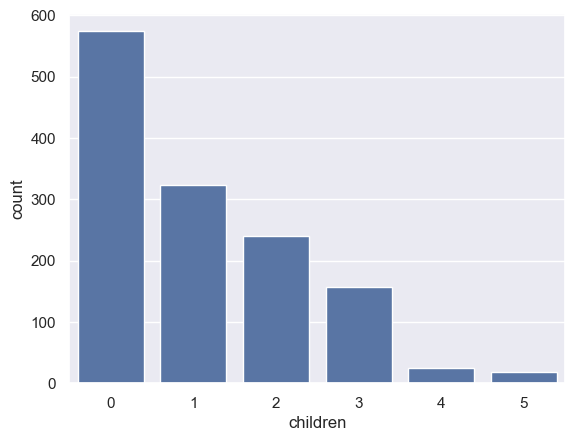

In [23]:
sns.countplot(x='children', data=df)

In [24]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

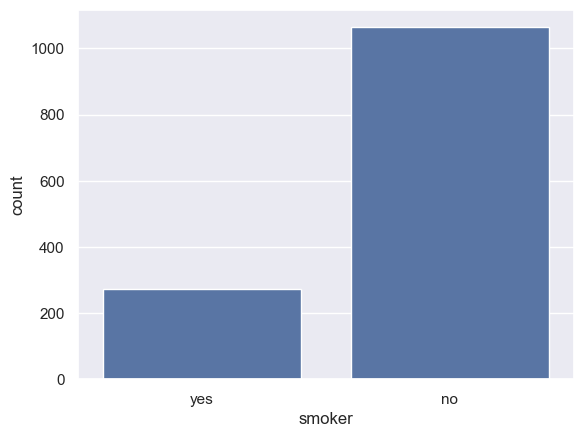

In [25]:
sns.countplot(x=df['smoker'])

In [26]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

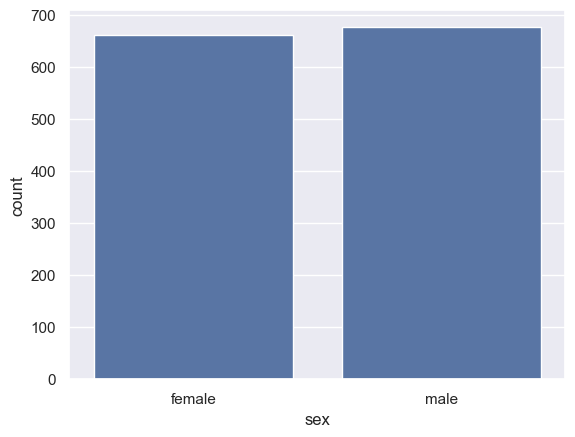

In [27]:
sns.countplot(x=df['sex'])

In [28]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: ylabel='charges'>

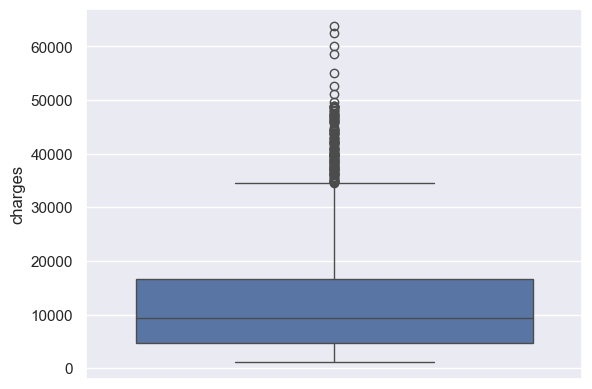

In [29]:
sns.boxplot(df['charges'])

In [30]:
#plt.figure(figsize=(10,6))
#sns.heatmap(df.corr(), annot=True, cmap='Purples_r')

## Checking Null values

In [31]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [32]:
df.corrwith(df['charges']).sort_values(ascending = False)

ValueError: could not convert string to float: 'female'

## Creating dictionaries to map the Non-numerical values

In [33]:
sex = {
    'female': 1,
    'male': 0
}

smoker = {
    'yes': 0,
    'no': 1
}

region = {
    'southeast': 0, 
    'southwest': 1,
    'northeast': 2,
    'northwest': 3
}

In [34]:
## Replacing the non-numerical columns with the dictionaries created above...
df['sex'].replace(sex, inplace=True)
df['smoker'].replace(smoker, inplace=True)
df['region'].replace(region, inplace=True)

In [35]:
## Updated Dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [36]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [37]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


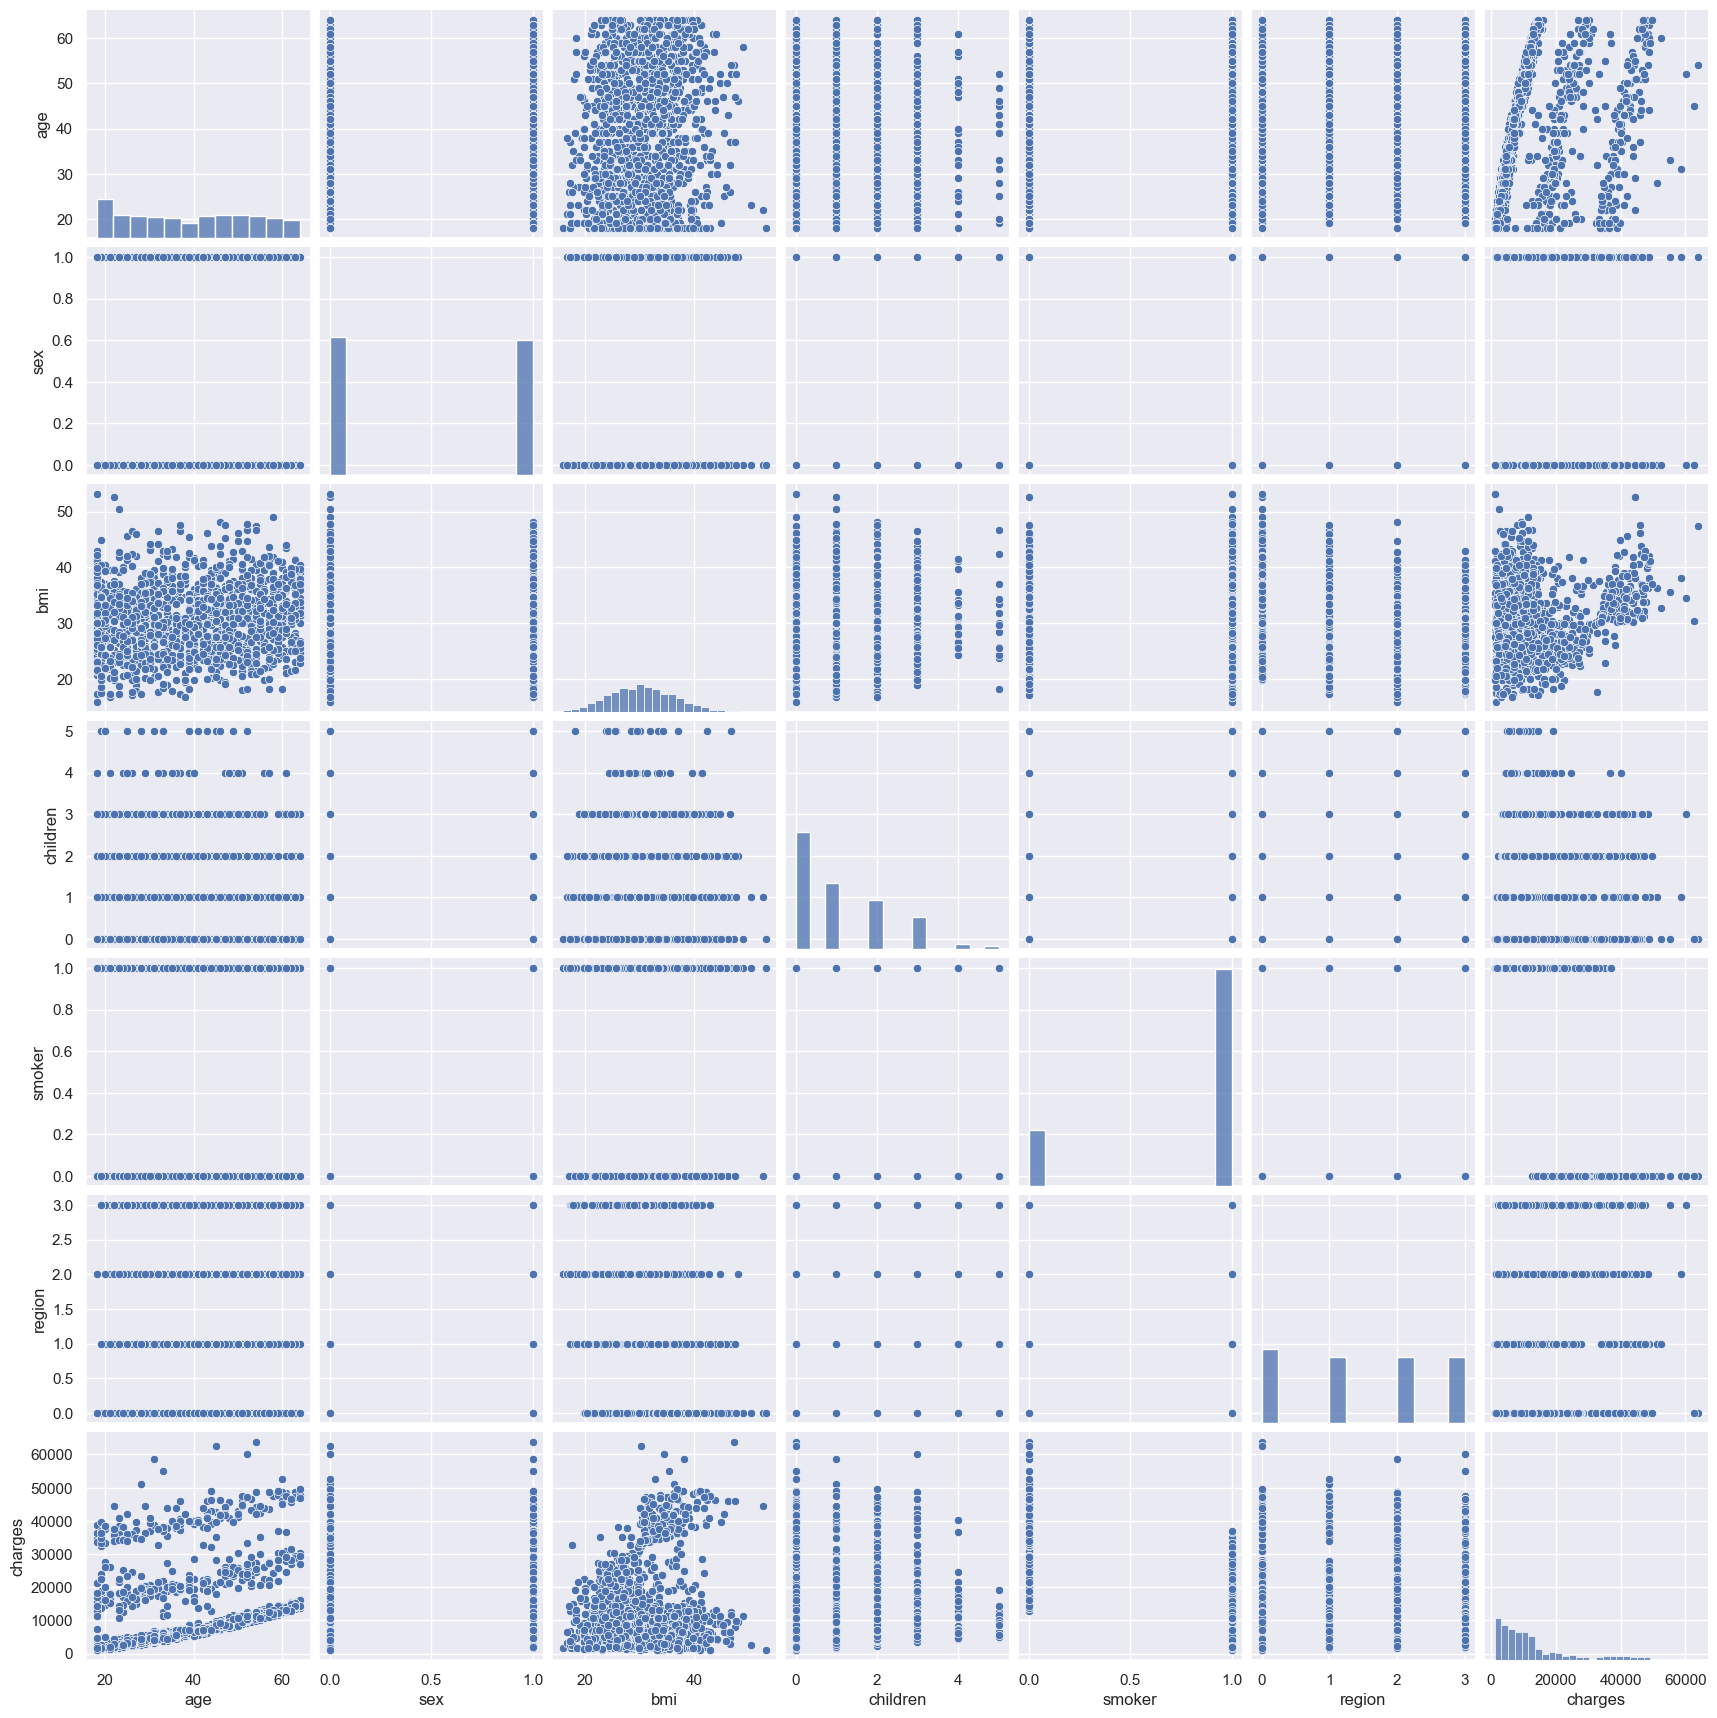

In [38]:
sns.pairplot(df)

## Check for Outliers 

In [39]:
def count_of_outliers(data):
    q25 = np.percentile(data, 25)
    q75 = np.percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    cut_off = iqr * 1.5
    upper = q75 + cut_off
    lower = q25 - cut_off
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    return len(outliers)

In [40]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [41]:
outlier_dict = {}
for col_value in df.columns:
    outlier_dict[col_value] = count_of_outliers(df[col_value])

Percentiles: 25th=27.000, 75th=51.000, IQR=24.000
Identified outliers: 0
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 0
Percentiles: 25th=26.296, 75th=34.694, IQR=8.398
Identified outliers: 9
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 0
Percentiles: 25th=1.000, 75th=1.000, IQR=0.000
Identified outliers: 274
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 0
Percentiles: 25th=4740.287, 75th=16639.913, IQR=11899.625
Identified outliers: 139


In [42]:
pd.DataFrame([outlier_dict])

,age,sex,bmi,children,smoker,region,charges
0,0,0,9,0,274,0,139


<Axes: >

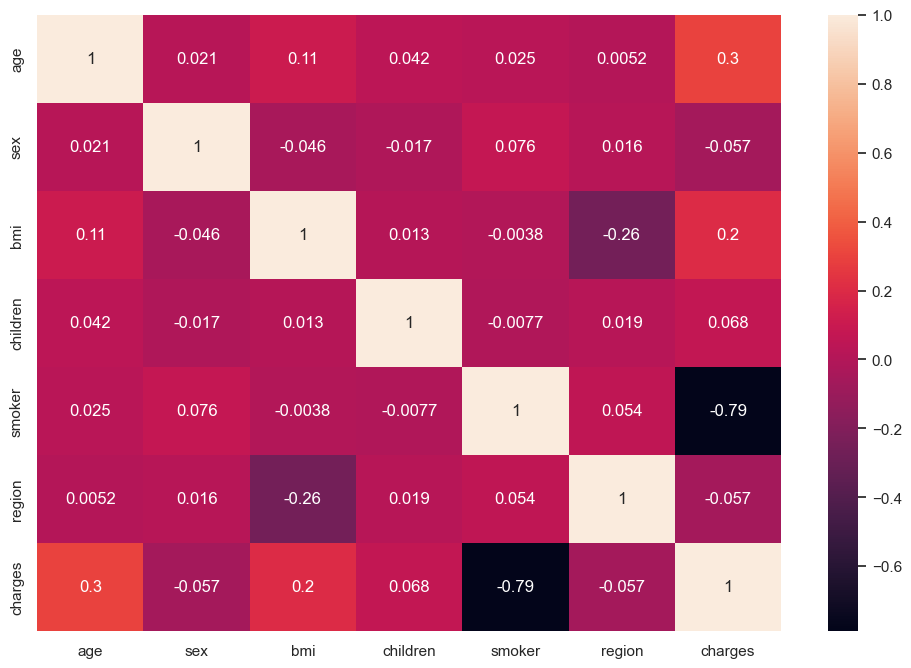

In [43]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot=True)

# Model Building

In [44]:
# X & Y Split
x = df.drop('charges',axis=1)
y = df['charges']

In [45]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [46]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Train Test Split


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size=0.5,
    random_state = 2
)

In [49]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (669, 6) (669, 6)


In [50]:
x_train.head()

,age,sex,bmi,children,smoker,region
1135,50,1,28.120,3,1,3
338,50,0,32.300,1,0,2
849,55,0,32.775,0,1,3
72,53,1,28.100,3,1,1
977,26,0,29.150,1,1,0


In [51]:
x_test.head()

,age,sex,bmi,children,smoker,region
17,23,0,23.845,0,1,2
1091,55,1,29.830,0,1,2
273,50,0,27.455,1,1,2
270,18,0,29.370,1,1,0
874,44,0,21.850,3,1,2


# Model Training & Predicting the Test Data

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 

In [53]:
#For training data prediction
reg.fit(x_train, y_train)
training_data_prediction = reg.predict(x_train)

#For test data prediction
reg.fit(x_test, y_test)
test_data_prediction = reg.predict(x_test)

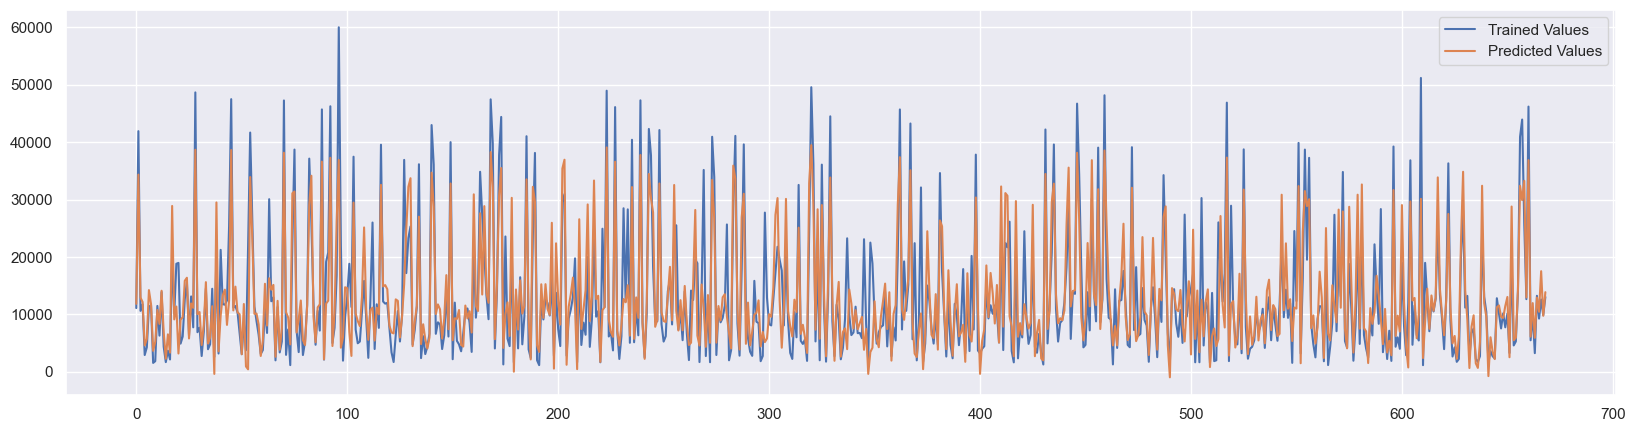

In [54]:
plt.figure(figsize=(20, 5))
plt.plot(y_train.values, label='Trained Values')
plt.plot(training_data_prediction, label='Predicted Values')
plt.legend()

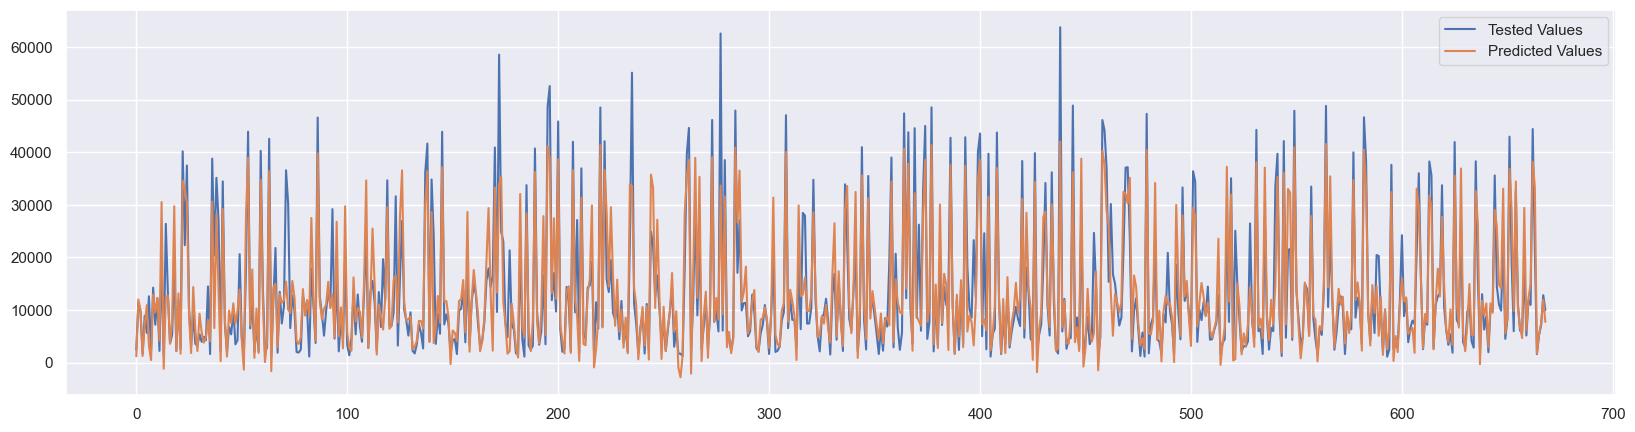

In [55]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label='Tested Values')
plt.plot(test_data_prediction, label='Predicted Values')
plt.legend()

# Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

# Predicting Data

In [57]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [58]:
age=input("Enter your Age:")
sex=input("Enter your Sex (Male=0; Female=1):")
bmi=input("Enter your BMI:")
children=input("No. of children:")
smoker=input("Smoke(Yes=0; N=1):")
region=input("Enter your region(Northeast = 0; Northwest = 1; Southeast = 2; Southwest = 3):")

Enter your Age: 21
Enter your Sex (Male=0; Female=1): 1
Enter your BMI: 25
No. of children: 0
Smoke(Yes=0; N=1): 1
Enter your region(Northeast = 0; Northwest = 1; Southeast = 2; Southwest = 3): 1


In [59]:
## Using Random Forest Regressor
new_data = (age, sex, bmi, children, smoker, region)

# Changing input data to a numpy array
new_data_as_numpy_array = np.asarray(new_data)

# Reshape the array
new_data_reshaped = new_data_as_numpy_array.reshape(1,-1)

# Predict
predictions = model.predict(new_data_reshaped)
print("Estimate cost of your Medical Insurance is: ₹", (predictions))

Estimate cost of your Medical Insurance is: ₹ [1911.2386285]


## Applying Polynomial Regression

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [61]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
p_reg = LinearRegression()
p_reg.fit(x_poly, y_train)
y_pred_poly = p_reg.predict(poly_reg.fit_transform(x_test))

In [62]:
R_Squared_value = metrics.r2_score(y_pred_poly,y_test)
print("Polynomial Regression model's R Squared Value is ", R_Squared_value)

Polynomial Regression model's R Squared Value is  0.8268170804904248


# Evaluting Model's Performance

### For Trained Values

In [63]:
MAE = metrics.mean_absolute_error(y_train,training_data_prediction)
MSE = metrics.mean_squared_error(y_train,training_data_prediction)
RMSE = np.sqrt(MSE)
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [64]:
print("Model's Mean Absolute Error is ", MAE)
print("Model's Mean Squared Error is ", MSE)
print("Model's Root Mean Squared Error is ", RMSE)
print("Model's R Squared Value is ", r2_train)

Model's Mean Absolute Error is  4383.082501548547
Model's Mean Squared Error is  38149206.21003981
Model's Root Mean Squared Error is  6176.504368171353
Model's R Squared Value is  0.7092409160706658


### For Tested Values

In [65]:
MAE = metrics.mean_absolute_error(y_test,test_data_prediction)
MSE = metrics.mean_squared_error(y_test,test_data_prediction)
RMSE = np.sqrt(MSE)
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [66]:
print("Model's Mean Absolute Error is ", MAE)
print("Model's Mean Squared Error is ", MSE)
print("Model's Root Mean Squared Error is ", RMSE)

# For Linear Regression
print("Model's R Squared Value for Linear Regression is ", r2_test)

# For Random Forest Regeressor
print("Model's score for Radnom Forest Regression is ", model.score(x_test, y_test))

Model's Mean Absolute Error is  3947.3033724233997
Model's Mean Squared Error is  34296413.98742459
Model's Root Mean Squared Error is  5856.314027391682
Model's R Squared Value for Linear Regression is  0.7881045720314764
Model's score for Radnom Forest Regression is  0.854476594127318


# Saving the Model

In [72]:
import pickle

In [73]:
with open('prediction.sav', 'wb') as files:
    pickle.dump(model, files)

In [74]:
## Loading the Model

model = pickle.load(open('prediction.sav', 'rb'))
predicted_data = model.predict(x_test)

In [75]:
metrics.r2_score(y_test, predicted_data)

0.854476594127318